## Create Latitude and Longitude Combinations

In [57]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy

In [58]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [59]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [60]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

## Get the City Weather Data

#### Import Dependencies, and Initialize an Empty List and Counters

In [61]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [62]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ddc114b26221886571a6d9338b01791


In [63]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ddc114b26221886571a6d9338b01791&q=Boston


In [64]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [65]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop Through the List of Cities and Build the City URL. Loop through all the cities in the list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
   # if (i % 50 == 0 and i >= 50):
     #   set_count += 1
     #   record_count = 1
    # Create endpoint URL with each city.
   # city_url = url + "&q=" + "i"


# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities
# and retrieve both the index, and the city from the list.


for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
        # Run an API request for each of the cities.       
# Add a try-except block to our code to prevent the API request from stopping prematurely
# if the city_weather request isn't a valid response.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | jena
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | anloga
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | monterey
Processing Record 12 of Set 1 | lokosovo
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | nyurba
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | montepuez
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | deputatskiy
Processing Record 20 of Set 1 | tadine
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | jinxiang
Processing Recor

Processing Record 38 of Set 4 | kahului
Processing Record 39 of Set 4 | kashi
City not found. Skipping...
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | farmington
Processing Record 42 of Set 4 | quatre cocos
Processing Record 43 of Set 4 | pousat
City not found. Skipping...
Processing Record 44 of Set 4 | kijang
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | kavaratti
Processing Record 47 of Set 4 | tabas
Processing Record 48 of Set 4 | keti bandar
Processing Record 49 of Set 4 | xining
Processing Record 50 of Set 4 | merauke
Processing Record 1 of Set 5 | carora
Processing Record 2 of Set 5 | yuncheng
Processing Record 3 of Set 5 | glendive
Processing Record 4 of Set 5 | takaka
Processing Record 5 of Set 5 | guzelyurt
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | rajgarh
Processing Record 8 of Set 5 | atar
Processing Record 9 of Set 5 | khandbari
Processing Record 10 of Set 5 | mahebourg
Processing Record 11 o

Processing Record 26 of Set 8 | leirvik
Processing Record 27 of Set 8 | qaanaaq
Processing Record 28 of Set 8 | lujan
Processing Record 29 of Set 8 | corum
Processing Record 30 of Set 8 | tera
Processing Record 31 of Set 8 | burns lake
Processing Record 32 of Set 8 | vredendal
Processing Record 33 of Set 8 | altamont
Processing Record 34 of Set 8 | ballina
Processing Record 35 of Set 8 | lebowakgomo
Processing Record 36 of Set 8 | honiara
Processing Record 37 of Set 8 | wahiawa
Processing Record 38 of Set 8 | midland
Processing Record 39 of Set 8 | plettenberg bay
Processing Record 40 of Set 8 | yelizovo
Processing Record 41 of Set 8 | severo-yeniseyskiy
Processing Record 42 of Set 8 | port pirie
Processing Record 43 of Set 8 | warrington
Processing Record 44 of Set 8 | yemtsa
Processing Record 45 of Set 8 | la palma
Processing Record 46 of Set 8 | durango
Processing Record 47 of Set 8 | pilar
Processing Record 48 of Set 8 | esil
Processing Record 49 of Set 8 | aswan
Processing Record 

Processing Record 16 of Set 12 | nome
Processing Record 17 of Set 12 | baruun-urt
Processing Record 18 of Set 12 | qom
Processing Record 19 of Set 12 | malwan
City not found. Skipping...
Processing Record 20 of Set 12 | palmer
Processing Record 21 of Set 12 | huanta
Processing Record 22 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 23 of Set 12 | ilulissat
Processing Record 24 of Set 12 | santa cruz
Processing Record 25 of Set 12 | cesky dub
Processing Record 26 of Set 12 | port hedland
Processing Record 27 of Set 12 | casma
Processing Record 28 of Set 12 | kenai
Processing Record 29 of Set 12 | trail
Processing Record 30 of Set 12 | lanzhou
Processing Record 31 of Set 12 | san ignacio
Processing Record 32 of Set 12 | kaeo
Processing Record 33 of Set 12 | rosarito
Processing Record 34 of Set 12 | krasnoselkup
City not found. Skipping...
Processing Record 35 of Set 12 | karaul
City not found. Skipping...
Processing Record 36 of Set 12 | teguise
Processing Record 37

In [66]:
# Tally the number of cities in the city_data array of dictionaries using the len() function.

print ("Number of cities in array of dictionaries = ", len( city_data))

Number of cities in array of dictionaries =  566



## Create a DataFrame of City Weather Data

In [67]:
# Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,50.00,61,75,20.80,AU,2019-11-07 05:43:50
1,Ushuaia,-54.81,-68.31,33.80,98,90,29.97,AR,2019-11-07 05:43:19
2,Jena,50.93,11.59,46.99,87,75,3.36,DE,2019-11-07 05:43:50
3,Saint-Philippe,45.36,-73.48,36.00,94,90,9.17,CA,2019-11-07 05:43:51
4,Anloga,5.79,0.90,75.20,94,20,2.24,GH,2019-11-07 05:43:51
5,Mar Del Plata,-46.43,-67.52,47.25,34,0,27.42,AR,2019-11-07 05:43:51
6,Mataura,-46.19,168.86,58.93,90,98,8.10,NZ,2019-11-07 05:43:51
7,Rikitea,-23.12,-134.97,76.73,82,31,5.57,PF,2019-11-07 05:43:51
8,Arraial Do Cabo,-22.97,-42.02,72.48,84,96,6.78,BR,2019-11-07 05:43:52
9,Monterey,36.60,-121.89,55.99,81,90,7.92,US,2019-11-07 05:39:10


In [68]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# Assign a new or the same DataFrame with new column order: df = df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2019-11-07 05:43:50,-42.88,147.33,50.00,61,75,20.80
1,Ushuaia,AR,2019-11-07 05:43:19,-54.81,-68.31,33.80,98,90,29.97
2,Jena,DE,2019-11-07 05:43:50,50.93,11.59,46.99,87,75,3.36
3,Saint-Philippe,CA,2019-11-07 05:43:51,45.36,-73.48,36.00,94,90,9.17
4,Anloga,GH,2019-11-07 05:43:51,5.79,0.90,75.20,94,20,2.24
5,Mar Del Plata,AR,2019-11-07 05:43:51,-46.43,-67.52,47.25,34,0,27.42
6,Mataura,NZ,2019-11-07 05:43:51,-46.19,168.86,58.93,90,98,8.10
7,Rikitea,PF,2019-11-07 05:43:51,-23.12,-134.97,76.73,82,31,5.57
8,Arraial Do Cabo,BR,2019-11-07 05:43:52,-22.97,-42.02,72.48,84,96,6.78
9,Monterey,US,2019-11-07 05:39:10,36.60,-121.89,55.99,81,90,7.92


In [69]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## Plot Latitude vs. Temperature


##### Get Data for Plotting 

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [71]:
# Convert the above JSON datestamp using the string format method, strftime() 
# and pass the formatting parameters for our date in parentheses.
import time

today = time.strftime("%x")
today

'11/06/19'

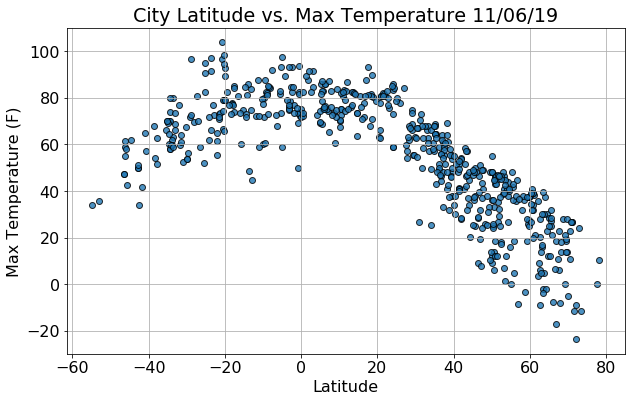

In [72]:
# Build the scatter plot for latitude vs. max temperature.
import matplotlib as mpl

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


## Plot Latitude vs. Humidity

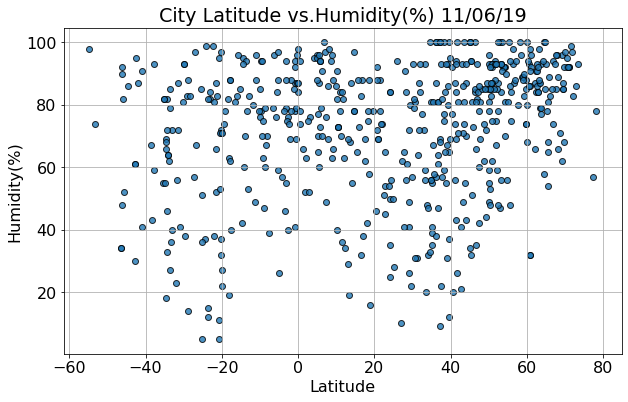

In [73]:
# Build the scatter plot for latitude vs. humidity.

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Humidity(%) "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16
# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


## Plot Latitude vs. Cloudiness

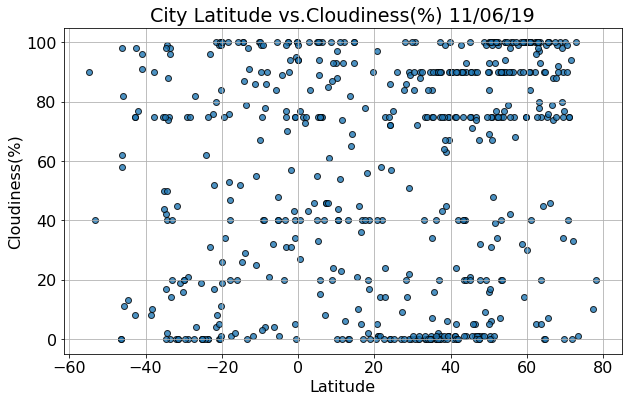

In [74]:
# Build the scatter plot for latitude vs. cloudiness.

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16
# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

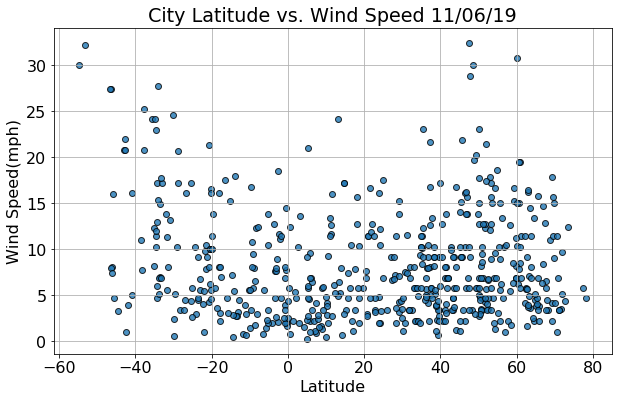

In [75]:
# Build the scatter plot for latitude vs. wind speed.

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16
# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## Find the Correlation Between Latitude and Maximum Temperature

##### Create a Linear Regression Function

In [76]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
#from scipy import stats

In [77]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
 
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.subplots(figsize=(10, 6))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

# To get an output from a function, we need to call the function with the correct number of parameters or
# arguments for the function.


#### Create the Northern Hemisphere DataFrames

In [78]:
# To perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres.
# To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame.
# The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. 
#The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].


In [79]:
# Let’s apply this method to our city_data_df DataFrame by adding the code index13 = df.loc[13]
index13 = city_data_df.loc[13]
index13

City                     Cherskiy
Country                        RU
Date          2019-11-07 05:43:53
Lat                         68.75
Lng                         161.3
Max Temp                    28.04
Humidity                       71
Cloudiness                    100
Wind Speed                  11.03
Name: 13, dtype: object

In [80]:
# Filter DataFrame based on a value of a row: get all Northern Hemisphere lat, for latitudes greater than or equal to 0

city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
561     True
562     True
563    False
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [81]:
# To return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, 
# we can use the loc method on the city_data_df

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jena,DE,2019-11-07 05:43:50,50.93,11.59,46.99,87,75,3.36
3,Saint-Philippe,CA,2019-11-07 05:43:51,45.36,-73.48,36.00,94,90,9.17
4,Anloga,GH,2019-11-07 05:43:51,5.79,0.90,75.20,94,20,2.24
9,Monterey,US,2019-11-07 05:39:10,36.60,-121.89,55.99,81,90,7.92
10,Lokosovo,RU,2019-11-07 05:43:52,61.13,74.84,38.25,96,100,11.50


#### Create the Southern Hemisphere DataFrames

In [82]:
# Filter DataFrame based on a value of a row: get all Southern Hemisphere lat, for latitudes less than 0

city_data_df["Lat"] < 0

0       True
1       True
2      False
3      False
4      False
       ...  
561    False
562    False
563     True
564    False
565    False
Name: Lat, Length: 566, dtype: bool

In [83]:
# To return a DataFrame with all data fitting the criteria, for latitudes less than 0, 
# we can use the loc method on the city_data_df

city_data_df.loc[(city_data_df["Lat"] < 0)]
city_data_df.loc[(city_data_df["Lat"] < 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2019-11-07 05:43:50,-42.88,147.33,50.00,61,75,20.80
1,Ushuaia,AR,2019-11-07 05:43:19,-54.81,-68.31,33.80,98,90,29.97
5,Mar Del Plata,AR,2019-11-07 05:43:51,-46.43,-67.52,47.25,34,0,27.42
6,Mataura,NZ,2019-11-07 05:43:51,-46.19,168.86,58.93,90,98,8.10
7,Rikitea,PF,2019-11-07 05:43:51,-23.12,-134.97,76.73,82,31,5.57


In [84]:
# Now assign DFs to the variables northern_hemi_df and southern_hemi_df resp., to access the data to perform linear regression.
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


#### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

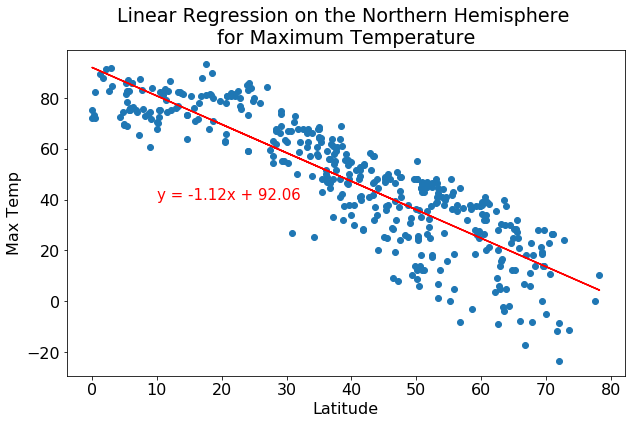

In [85]:
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))


#### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

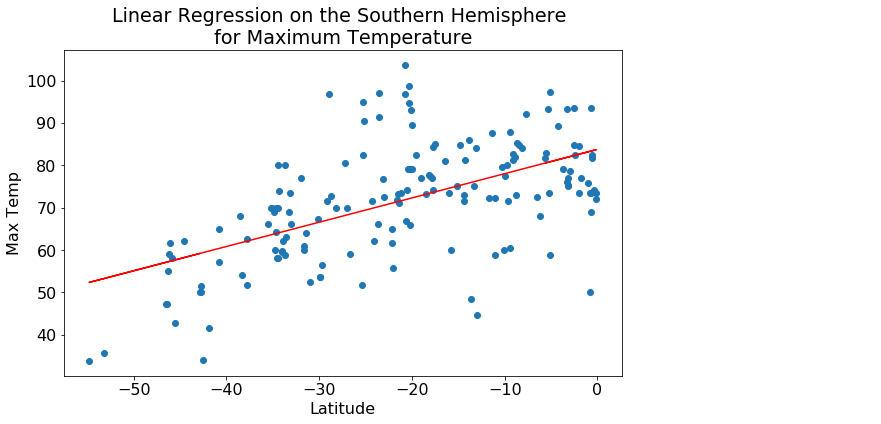

In [86]:
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column
# from the northern_hemi_df DataFrame.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(15,30))


## Find the Correlation Between Latitude and Percent Humidity


#### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

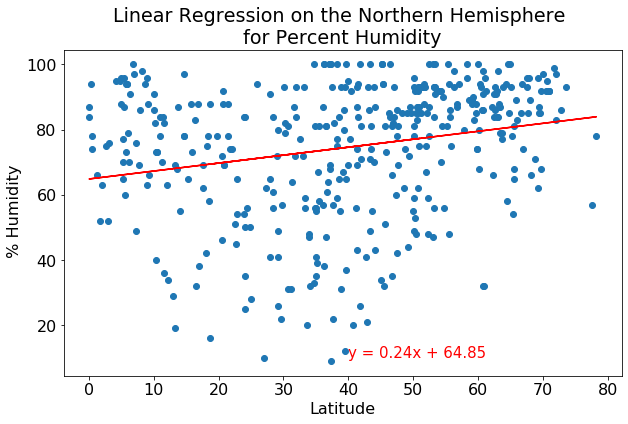

In [87]:
# Set the x values equal to the latitude column and the y values equal to the percent humidity column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Percent Humidity', ' % Humidity',(40,10))

#### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

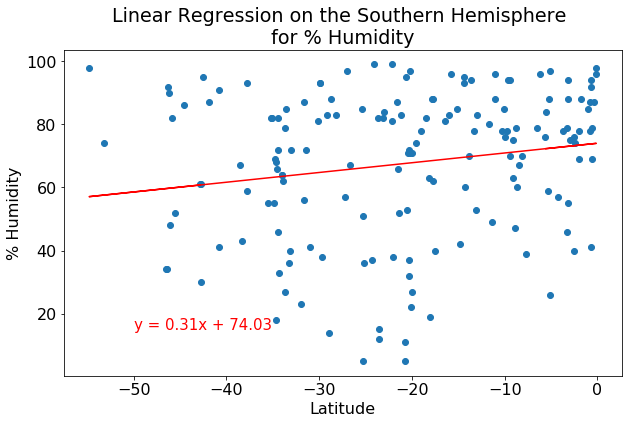

In [88]:
# Set the x values equal to the latitude column and the y values equal to the Percent Humidity column
# from the southern_hemi_df DataFrame.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50, 15))

## Find the Correlation Between Latitude and Percent Cloudiness


##### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

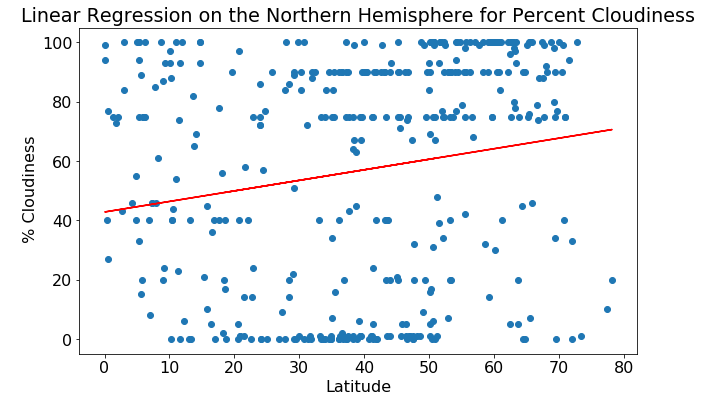

In [96]:
# Set the x values equal to the latitude column and the y values equal to the percent cloudiness column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Percent Cloudiness', ' % Cloudiness',(-15, 30))

#### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

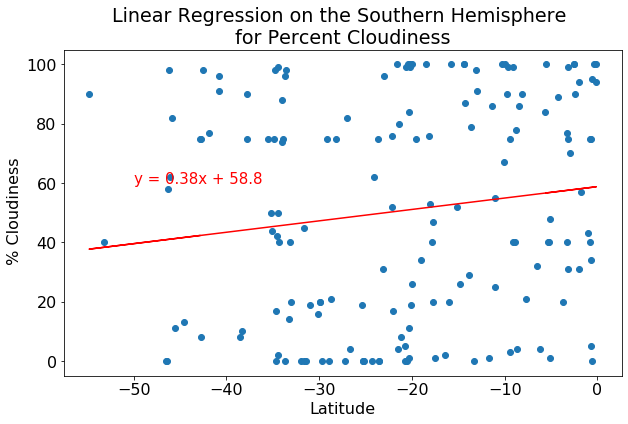

In [90]:
# Set the x values equal to the latitude column and the y values equal to the percent cloudiness column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Percent Cloudiness', ' % Cloudiness',(-50, 60))


## Find the Correlation Between Latitude and Wind Speed


##### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

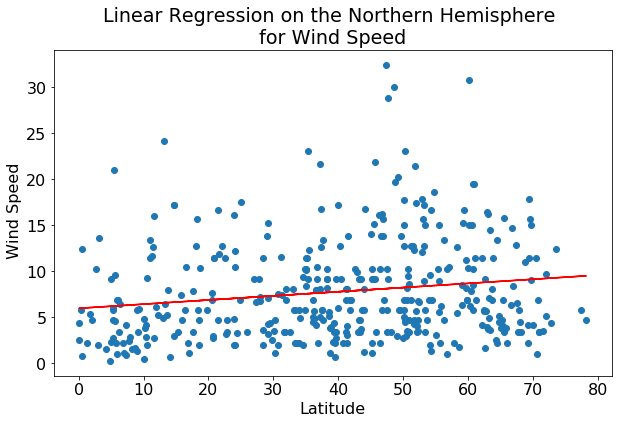

In [91]:
# Set the x values equal to the latitude column and the y values equal to the Wind Speed column
# from the northern_hemi_df DataFrame.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', ' Wind Speed',(40, 35))


#### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

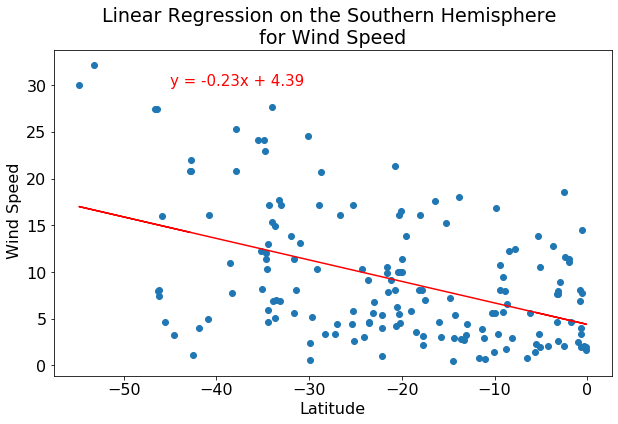

In [92]:
# Set the x values equal to the latitude column and the y values equal to Wind Speed column
# from the southern_hemi_df DataFrame.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', ' Wind Speed',(-45, 30))